### TODO:
* Possible to set two (or more) sets of coordinates? e.g. iline/xline and lat/lon
* `.to_segy` method
* orientation of plots (.T, origin)

In [1]:
import segyio
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import xarray as xr

In [2]:
# fp = "D:/datasets/iacopini_new_zealand/nz_realized"
fp = "D:/datasets/gullfaks/gullfaks.segy"

In [3]:
cube = segyio.tools.cube(fp)

In [4]:
extent = [452500, 459000, 6785500, 6788230, -1500, -2200]
xcoords, ycoords, zcoords = [np.linspace(extent[i], extent[i+1], cube.shape[int(i/2)]) for i in range(0,6,2)]

In [5]:
coords = [("x", xcoords), 
          ("y", ycoords), 
          ("z", zcoords)]

In [6]:
import sys
sys.path.append("../../git/subsurface/")
import subsurface.io
from importlib import reload

In [7]:
seismic = subsurface.io.from_segy(fp)

In [8]:
seismic = subsurface.Seismic(cube, coords=coords)

In [9]:
seismic.coords

Coordinates:
  * x        (x) float64 4.525e+05 4.525e+05 4.525e+05 ... 4.59e+05 4.59e+05
  * y        (y) float64 6.786e+06 6.786e+06 6.786e+06 ... 6.788e+06 6.788e+06
  * z        (z) float64 -1.5e+03 -1.503e+03 -1.506e+03 ... -2.197e+03 -2.2e+03

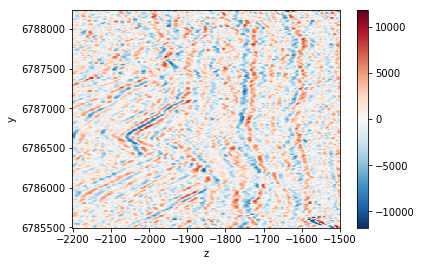

In [10]:
seismic[0,:,:].plot()

In [11]:
type(seismic[0,:,:])

subsurface.seismic.Seismic

In [29]:
list(seismic.coords.items())[0][1]

<xarray.DataArray 'x' (x: 375)>
array([452500.      , 452517.379679, 452534.759358, ..., 458965.240642,
       458982.620321, 459000.      ])
Coordinates:
  * x        (x) float64 4.525e+05 4.525e+05 4.525e+05 ... 4.59e+05 4.59e+05

In [21]:
for i in (0, slice(None, None, None), slice(None, None, None)):
    print(i)

0
slice(None, None, None)
slice(None, None, None)


In [9]:
seismic[0,:,:]

(0, slice(None, None, None), slice(None, None, None))


<xarray.DataArray (dim_0: 301, dim_1: 227)>
array([[ 3981.6274 ,  2171.7969 ,     0.     , ...,  1628.8475 ,  2171.7969 ,
         1266.8815 ],
       [ 2533.763  ,  6243.9155 ,  8596.695  , ...,  1447.8645 ,   723.93225,
         -904.91534],
       [ -180.98306,  4615.0684 ,  9320.628  , ...,  1085.8984 ,  -361.96613,
        -2171.7969 ],
       ...,
       [-4253.102  , -3529.1697 , -2352.7798 , ...,  -904.91534,   904.91534,
         3257.695  ],
       [-6967.848  , -4977.034  , -2986.2205 , ..., -2352.7798 , -1990.8137 ,
         -361.96613],
       [-5158.0176 , -5519.9834 , -5519.9834 , ..., -3529.1697 , -2171.7969 ,
            0.     ]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1

In [13]:
seismic.coords["x"]

<xarray.DataArray 'x' (x: 375)>
array([452500.      , 452517.379679, 452534.759358, ..., 458965.240642,
       458982.620321, 459000.      ])
Coordinates:
  * x        (x) float64 4.525e+05 4.525e+05 4.525e+05 ... 4.59e+05 4.59e+05

In [9]:
type(seismic)

subsurface.seismic.Seismic

In [10]:
type(seismic[0,:,:])

subsurface.seismic.Seismic

lel


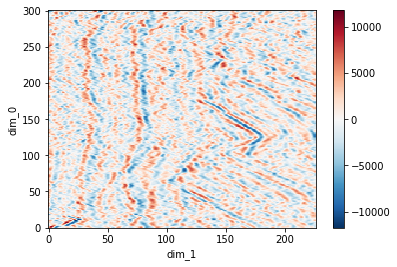

In [12]:
seismic[0,:, :].plot()

In [9]:
seismic.data = seismic.data.T

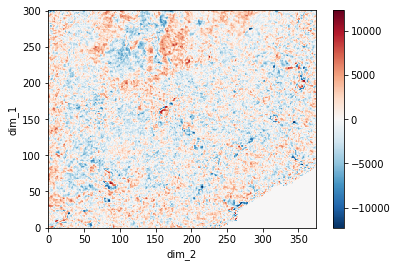

In [10]:
seismic[0,:,:].plot()

In [51]:
seismic.data.shape

(375, 301, 227)

In [52]:
seismic.data.T.shape

(227, 301, 375)

In [53]:
np.swapaxes(seismic.data, 0, 2).shape

(227, 301, 375)

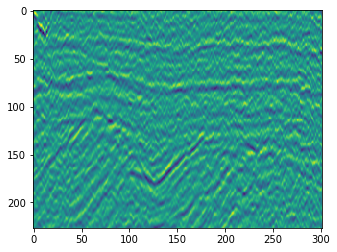

In [49]:
plt.imshow(seismic.data[0,:,:].T)

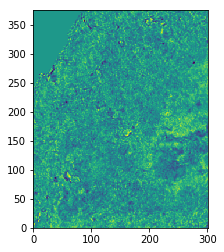

In [17]:
plt.imshow(seismic.data[:,:,0], origin="lower")

In [21]:
np.flip(seismic).shape

(375, 301, 227)

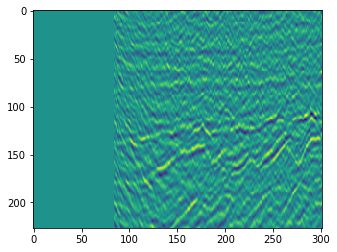

In [31]:
plt.imshow(np.flip(seismic.data, axis=0)[0, :, :].T)

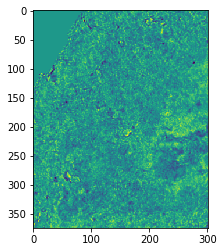

In [23]:
plt.imshow(np.flip(seismic, axis=0)[:, :, 0])

In [19]:
seismic.data.shape

(375, 301, 227)

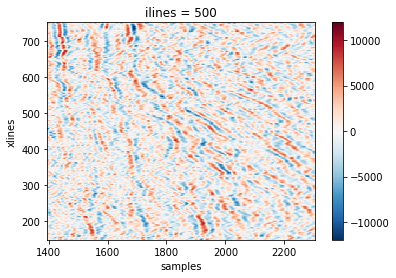

In [17]:
seismic.loc[500].plot()

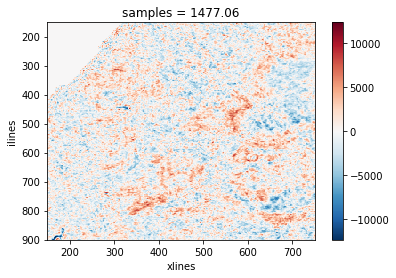

In [11]:
seismic.plot_section(20, "z")

plt.gca().invert_yaxis()

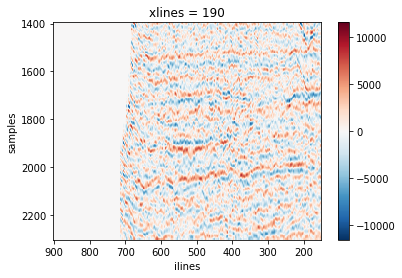

In [23]:
seismic[:,20,:].T.plot()

plt.gca().invert_yaxis()

plt.gca().invert_xaxis()

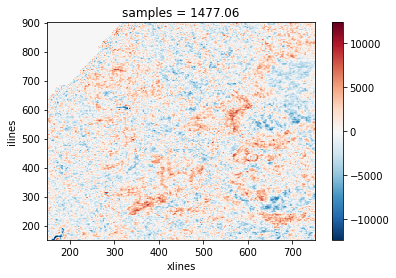

In [25]:
seismic[:,:, 20].plot()

(array([4.445000e+03, 4.320800e+04, 3.991580e+05, 2.408067e+06,
        6.525107e+06, 9.379745e+06, 5.143508e+06, 1.498552e+06,
        2.043500e+05, 1.648500e+04]),
 array([-12306.849 ,  -9999.314 ,  -7691.7803,  -5384.2466,  -3076.7124,
          -769.1782,   1538.3558,   3845.89  ,   6153.424 ,   8460.958 ,
         10768.492 ], dtype=float32),
 <a list of 10 Patch objects>)

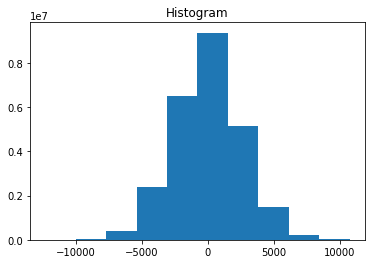

In [10]:
seismic._xarray.plot()

In [184]:
seismic = subsurface.Seismic(cube, coords=coords)

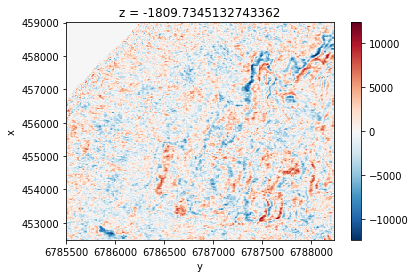

In [185]:
seismic[:,:,100].plot()

In [180]:
str(seismic)

'<xarray.Seismic (dim_0: 375, dim_1: 301, dim_2: 227)>\narray([[[ 3981.6274 ,  2171.7969 , ...,  2171.7969 ,  1266.8815 ],\n        [ 2533.763  ,  6243.9155 , ...,   723.93225,  -904.91534],\n        ...,\n        [-6967.848  , -4977.034  , ..., -1990.8137 ,  -361.96613],\n        [-5158.0176 , -5519.9834 , ..., -2171.7969 ,     0.     ]],\n\n       [[ -361.96613, -3348.1868 , ...,  1266.8815 ,  1990.8137 ],\n        [ 4253.102  ,  4072.119  , ...,  -904.91534,  -904.91534],\n        ...,\n        [-6243.9155 , -4796.0513 , ..., -2443.2715 , -1266.8815 ],\n        [-3348.1868 , -5519.9834 , ..., -1809.8307 , -1085.8984 ]],\n\n       ...,\n\n       [[    0.     ,     0.     , ...,     0.     ,     0.     ],\n        [    0.     ,     0.     , ...,     0.     ,     0.     ],\n        ...,\n        [  723.93225,   361.96613, ..., -1990.8137 , -1447.8645 ],\n        [ -180.98306, -2624.2544 , ...,  -542.9492 ,  -542.9492 ]],\n\n       [[    0.     ,     0.     , ...,     0.     ,     0.   

In [6]:
subsurface.types.Seismic(cube)

<xarray.Seismic (dim_0: 375, dim_1: 301, dim_2: 227)>
array([[[ 3981.6274 ,  2171.7969 , ...,  2171.7969 ,  1266.8815 ],
        [ 2533.763  ,  6243.9155 , ...,   723.93225,  -904.91534],
        ...,
        [-6967.848  , -4977.034  , ..., -1990.8137 ,  -361.96613],
        [-5158.0176 , -5519.9834 , ..., -2171.7969 ,     0.     ]],

       [[ -361.96613, -3348.1868 , ...,  1266.8815 ,  1990.8137 ],
        [ 4253.102  ,  4072.119  , ...,  -904.91534,  -904.91534],
        ...,
        [-6243.9155 , -4796.0513 , ..., -2443.2715 , -1266.8815 ],
        [-3348.1868 , -5519.9834 , ..., -1809.8307 , -1085.8984 ]],

       ...,

       [[    0.     ,     0.     , ...,     0.     ,     0.     ],
        [    0.     ,     0.     , ...,     0.     ,     0.     ],
        ...,
        [  723.93225,   361.96613, ..., -1990.8137 , -1447.8645 ],
        [ -180.98306, -2624.2544 , ...,  -542.9492 ,  -542.9492 ]],

       [[    0.     ,     0.     , ...,     0.     ,     0.     ],
        [    0.  

In [7]:
seiskwargs = dict(cmap="seismic", origin="upper")

In [8]:
import pint
ureg = pint.UnitRegistry()

MetPy combines Pint units with XArray

* https://github.com/Unidata/MetPy/blob/master/metpy/units.py
* https://github.com/Unidata/MetPy/blob/master/metpy/xarray.py

Extending xarray: composition over inheritance

* http://xarray.pydata.org/en/stable/internals.html

In [264]:
coords = [("x", xcoords), 
                      ("y", ycoords), 
                      ("z", zcoords)]

In [287]:
dict.update?

Docstring:
D.update([E, ]**F) -> None.  Update D from dict/iterable E and F.
If E is present and has a .keys() method, then does:  for k in E: D[k] = E[k]
If E is present and lacks a .keys() method, then does:  for k, v in E: D[k] = v
In either case, this is followed by: for k in F:  D[k] = F[k]
Type:      method_descriptor


In [68]:
seismic = xr.DataArray(
            data=cube, 
            coords = [("x", xcoords), 
                      ("y", ycoords), 
                      ("z", zcoords)]
          )

In [10]:
section = seismic[:, :, 150]

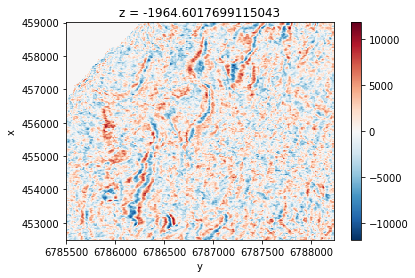

In [11]:
section.plot()

In [73]:
@xr.register_dataarray_accessor("seismic")
class Seismic(object):
    def __init__(self, xarray_obj):
        self._obj = xarray_obj

In [74]:
xrseis = Seismic(seismic)

In [79]:
seismic = xr.DataArray(
            data=cube, 
            coords = [("x", xcoords), 
                      ("y", ycoords), 
                      ("z", zcoords)]
          )

In [112]:
class Seismic(xr.DataArray):
    def __init__(self, data, *args, **kwargs):
        super().__init__(data, *args, **kwargs)
        
    def to_segy(self):
        pass

In [109]:
test = Seismic(cube, coords=coords)
type(test)

__main__.Seismic

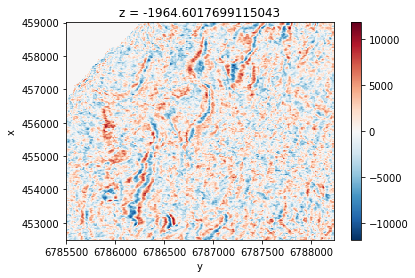

In [110]:
test[:, :, 150].plot()

In [ ]:
coords = [""]

In [246]:
with segyio.open(fp) as segyfile:
    segyfile.mmap()
    
    # Print binary header info
    print(segyfile.bin)
    print(segyfile.bin[segyio.BinField.Traces])
    
    print(segyfile.xlines)
    print(segyfile.ilines.shape)

{JobID: 1, LineNumber: 1, ReelNumber: 1, Traces: 1, AuxTraces: 0, Interval: 4003, IntervalOriginal: 0, Samples: 227, SamplesOriginal: 0, Format: 5, EnsembleFold: 1, SortingCode: 4, VerticalSum: 1, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 1, VibratoryPolarity: 0, SEGYRevision: 0, TraceFlag: 0, ExtendedHeaders: 0}
1
[150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184
 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214 216 218 220
 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250 252 254 256
 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286 288 290 292
 294 296 298 300 302 304 306 308 310 312 314 316 318 320 322 324 326 328
 330 332 334 336 338 340 342 344 346 348 350 352 354 356 358 360 362 364
 366 368 370 372 374 376 378 380 382 38

In [124]:
import sys

In [295]:
seismic = subsurface.types.Seismic.from_segy(fp)

In [297]:
subsurface.types.Seismic(cube, extent=extent)

TypeError: __init__() got an unexpected keyword argument 'extent'

In [293]:
extent

[452500, 459000, 6785500, 6788230, -1500, -2200]

In [286]:
seismic

<xarray.Seismic (dim_0: 375, dim_1: 301, dim_2: 227)>
array([[[ 3981.6274 ,  2171.7969 , ...,  2171.7969 ,  1266.8815 ],
        [ 2533.763  ,  6243.9155 , ...,   723.93225,  -904.91534],
        ...,
        [-6967.848  , -4977.034  , ..., -1990.8137 ,  -361.96613],
        [-5158.0176 , -5519.9834 , ..., -2171.7969 ,     0.     ]],

       [[ -361.96613, -3348.1868 , ...,  1266.8815 ,  1990.8137 ],
        [ 4253.102  ,  4072.119  , ...,  -904.91534,  -904.91534],
        ...,
        [-6243.9155 , -4796.0513 , ..., -2443.2715 , -1266.8815 ],
        [-3348.1868 , -5519.9834 , ..., -1809.8307 , -1085.8984 ]],

       ...,

       [[    0.     ,     0.     , ...,     0.     ,     0.     ],
        [    0.     ,     0.     , ...,     0.     ,     0.     ],
        ...,
        [  723.93225,   361.96613, ..., -1990.8137 , -1447.8645 ],
        [ -180.98306, -2624.2544 , ...,  -542.9492 ,  -542.9492 ]],

       [[    0.     ,     0.     , ...,     0.     ,     0.     ],
        [    0.  

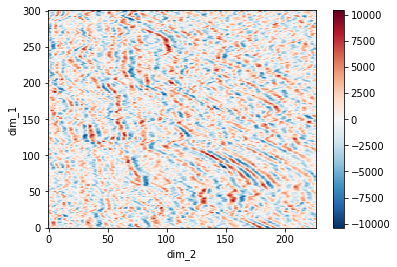

In [262]:
seismic[120,:,:].plot()

In [240]:
reload(subsurface.types)
seismic = subsurface.types.Seismic(cube, coords=coords)

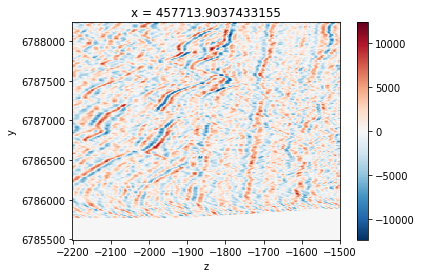

In [243]:
seismic[300,:,:].plot()

In [242]:
seismic[300,:,:].T.plot

In [141]:
type(seismic)

subsurface.types.Seismic

In [145]:
cube.shape

(825, 1455, 744)

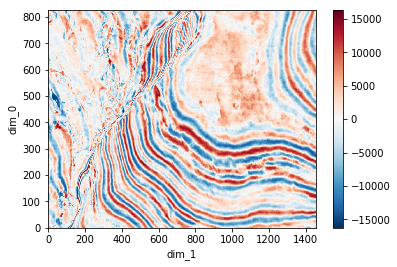

In [146]:
seismic[:, :, 150].plot()

In [155]:
with segyio.open(fp) as segyfile:
    segyfile.mmap()
    
    # Print binary header info
    print(segyfile.bin)
#     print(segyfile.bin[segyio.BinField.Traces])
    
#     print(segyfile.xlines.shape)
#     print(segyfile.ilines.shape)
#     print(segyfile.samples)
    
    

{JobID: 1, LineNumber: 1, ReelNumber: 1, Traces: 1, AuxTraces: 0, Interval: 4000, IntervalOriginal: 0, Samples: 744, SamplesOriginal: 0, Format: 5, EnsembleFold: 1, SortingCode: 4, VerticalSum: 1, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 1, VibratoryPolarity: 0, SEGYRevision: 0, TraceFlag: 0, ExtendedHeaders: 0}


In [149]:
seismic.shape

(825, 1455, 744)

In [159]:
seismic.header

AttributeError: 'Seismic' object has no attribute 'header'